In [1]:
import music21
import numpy as np
import os
import pickle

In [2]:
file_list = []
data_path = './data/midi_gt_solo/'

for file_name in os.listdir(data_path):
    if file_name.endswith('.mid') or file_name.endswith('.midi'):
        file_list.append(data_path + file_name)

In [3]:
def create_mel_data_each_file(midi_obj):
    mel_data = dict()


    print(len(midi_obj.flat.getElementsByClass(music21.chord.Chord)))
    for n in midi_obj.flat.getElementsByClass(music21.chord.Chord):
#         print('----')
#         print("chord {} : {}".format(n, n.offset))
#         print("notes {}".format(n.pitches))
        if n.offset not in mel_data:
            mel_data[n.offset] = dict()
        mel_data[n.offset]['offset'] = n.offset
        for p in n.pitches:
            mel_data[n.offset]['note'] = p.midi
#             print("note {} : {}: ".format(p.midi, n.offset))

    print(len(midi_obj.flat.getElementsByClass(music21.note.Note)))
    for n in midi_obj.flat.getElementsByClass(music21.note.Note):
#         print('----')
#         print("note {} : offset {}".format(n, n.offset))
#         print("note pitch {}".format(n.pitches))
        if n.offset not in mel_data:
            mel_data[n.offset] = dict()
        mel_data[n.offset]['offset'] = n.offset
        prev_p = 0
        for p in n.pitches:
            if prev_p < p.midi:
                mel_data[n.offset]['note'] = p.midi
            prev_p = p.midi    
#             print("note {} : {}: ".format(p.midi, n.offset))
    
    return mel_data

In [4]:
mel_arr_list = []

for file_name in file_list:
    print(file_name)
    midi_obj = music21.converter.parse(file_name)
    mel_data = create_mel_data_each_file(midi_obj)

    mel_arr = []
    for key in sorted(mel_data.iterkeys()):
        mel_arr.append(mel_data[key])
    
    mel_arr_list.append(mel_arr)
    

./data/midi_gt_solo/G_InThePresenceOfEnemies(Part1).mid
551
1150
./data/midi_gt_solo/G_Lie.mid
522
617
./data/midi_gt_solo/G_LinesInTheSand.mid
178
1445
./data/midi_gt_solo/G_LostNotForgotten.mid
628
2205
./data/midi_gt_solo/G_Outcry.mid
495
1627
./data/midi_gt_solo/G_Overture1928.mid
258
583
./data/midi_gt_solo/G_PanicAttack.mid
391
2373
./data/midi_gt_solo/G_PullMeUnder.mid
426
1131
./data/midi_gt_solo/G_SacrificedSons.mid
126
1455
./data/midi_gt_solo/G_Scarred.mid
502
606
./data/midi_gt_solo/G_StrangeDejaVukar.mid
167
543
./data/midi_gt_solo/G_StreamOfConsciousness.mid
674
1387
./data/midi_gt_solo/G_TheDanceOfEternity.mid
9
1705
./data/midi_gt_solo/G_TheDarkEternalNight.mid
304
2453
./data/midi_gt_solo/G_TheGlassPrison.mid
377
4189
./data/midi_gt_solo/G_TheGreatDebate.mid
304
1479
./data/midi_gt_solo/G_TheRootOfAllEvil.mid
636
799
./data/midi_gt_solo/G_TheShatteredFortress.mid
781
1983
./data/midi_gt_solo/G_TheTestThatStumpedThemAll.mid
204
1538
./data/midi_gt_solo/G_thisdyingsoul.m

In [5]:
len(mel_arr_list)

21

In [6]:
mel_arr_list[0]

[{'note': 69, 'offset': 0.0},
 {'note': 65, 'offset': 0.5},
 {'note': 67, 'offset': 1.0},
 {'note': 64, 'offset': 1.5},
 {'note': 62, 'offset': 2.0},
 {'note': 65, 'offset': 2.5},
 {'note': 62, 'offset': 3.0},
 {'note': 64, 'offset': 3.5},
 {'note': 60, 'offset': 4.0},
 {'note': 57, 'offset': 4.5},
 {'note': 62, 'offset': 5.0},
 {'note': 57, 'offset': 5.5},
 {'note': 55, 'offset': 6.0},
 {'note': 60, 'offset': 6.5},
 {'note': 55, 'offset': 7.0},
 {'note': 53, 'offset': 7.5},
 {'note': 52, 'offset': 8.0},
 {'note': 50, 'offset': 8.5},
 {'note': 45, 'offset': 9.0},
 {'note': 43, 'offset': 9.5},
 {'note': 48, 'offset': 10.0},
 {'note': 43, 'offset': 10.5},
 {'note': 41, 'offset': 11.0},
 {'note': 40, 'offset': 11.5},
 {'note': 50, 'offset': 12.0},
 {'note': 50, 'offset': 12.5},
 {'note': 50, 'offset': 13.0},
 {'note': 57, 'offset': 13.5},
 {'note': 50, 'offset': 14.0},
 {'note': 55, 'offset': 14.5},
 {'note': 50, 'offset': 15.0},
 {'note': 57, 'offset': 15.5},
 {'note': 50, 'offset': 16.0

In [6]:
print(len(mel_arr_list))
print(len(file_list))
print(len(mel_arr_list[0]))

21
21
1687


In [ ]:
with open("mel_arr_list.p", "wb") as fp:   #Pickling
    pickle.dump(mel_arr_list, fp)

if melody data had been saved

In [9]:
with open("mel_arr_list.p", "rb") as fp:   # Unpickling
    mel_arr_list = pickle.load(fp)

In [7]:
def create_curve_seq(mel_arr):
    curve_seq = []
    for idx in range(1, len(mel_arr)):
        curr_p_diff = mel_arr[idx]['note'] - mel_arr[idx-1]['note']
        curr_t_diff = mel_arr[idx]['offset'] - mel_arr[idx-1]['offset']
        curve_seq.append((curr_p_diff, curr_t_diff))
    return curve_seq

In [8]:
def create_longer_curve_seq(mel_arr):
    curve_seq = []
    for idx in range(2, len(mel_zrr)):
        curr_p_diff = [mel_arr[idx]['note'] - mel_arr[idx-1]['note'], mel_arr[idx-1]['note'] - mel_arr[idx-2]['note']]
        curr_p_diff = [mel_arr[idx]['offset'] - mel_arr[idx-1]['offset'], mel_arr[idx-1]['offset'] - mel_arr[idx-2]['offset']]
        curve_seq.append((curr_p_diff, curr_t_diff))
    return curve_seq


In [9]:
curve_seq_list = []
for mel_arr in mel_arr_list:
    curve_seq_list.append(create_curve_seq(mel_arr))

print(len(curve_seq_list))
# print(curve_seq_list)

21


In [10]:
# flatten
curve_corpus= sum(curve_seq_list, [])
print(len(curve_corpus))

# flattened seq
mel_seq = curve_corpus
# print(curve_corpus)

36934


In [11]:
# prepare the complete set, and pairs of data and indices
def get_corpus_data(curve_corpus):
    curve_corpus_set = set(curve_corpus) 
    val_indices = dict((v, i) for i, v in enumerate(curve_corpus_set))
    indices_val = dict((i, v) for i, v in enumerate(curve_corpus_set))

    return curve_corpus_set, val_indices, indices_val


In [12]:
mel_set, mel_v_i, mel_i_v = get_corpus_data(curve_corpus)

In [13]:
vocab_size = len(mel_set)
print(vocab_size)

754


In [14]:
mel_set

{(-53, 6.0),
 (-48, 0.25),
 (-42, 1.0),
 (-39, 0.25),
 (-37, 4.25),
 (-34, 2.0),
 (-32, 0.08333333333331439),
 (-32, 2.25),
 (-31, 0.5),
 (-31, 1.0),
 (-30, 0.25),
 (-30, 0.5),
 (-29, 0.5),
 (-29, 1.5),
 (-29, 3.5),
 (-29, 6.0),
 (-28, 0.25),
 (-28, 1.5),
 (-27, 0.25),
 (-27, 0.5),
 (-27, 1.0),
 (-27, 1.5),
 (-26, 0.25),
 (-26, 0.5),
 (-26, 2.0),
 (-25, 1.0),
 (-25, 1.5),
 (-25, 7.0),
 (-24, 0.25),
 (-24, 0.5),
 (-24, 2.5),
 (-24, 3.0),
 (-24, 24.0),
 (-23, 1.0),
 (-23, 3.0),
 (-23, 4.5),
 (-22, 0.25),
 (-22, 0.5),
 (-22, 1.0),
 (-22, 2.5),
 (-22, 16.0),
 (-21, 0.5),
 (-21, 1.5),
 (-21, 3.0),
 (-21, 4.5),
 (-20, 0.25),
 (-20, 0.5),
 (-20, 1.0),
 (-20, 1.5),
 (-20, 2.0),
 (-20, 3.0),
 (-19, 0.25),
 (-19, 0.5),
 (-19, 0.6666666666666288),
 (-19, 0.75),
 (-19, 1.0),
 (-19, 1.5),
 (-19, 2.25),
 (-19, 2.5),
 (-19, 3.0),
 (-19, 4.0),
 (-19, 6.0),
 (-19, 8.0),
 (-18, 0.5),
 (-18, 1.0),
 (-18, 1.5),
 (-18, 2.0),
 (-18, 2.25),
 (-18, 2.5),
 (-18, 3.0),
 (-18, 4.0),
 (-17, 0.25),
 (-17, 0.5),
 (

In [17]:
mel_v_i[(-53, 6.0)]

454

In [21]:
mel_v_i[(29, 2.0)]

477

In [25]:
midi_obj = music21.converter.parse(file_name)

In [26]:
midi_obj[0].elements

(<music21.instrument.Instrument >,
 <music21.tempo.MetronomeMark allegro moderato Quarter=130.0>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.chord.Chord E-2 B-2>,
 <music21.note.Rest rest>,
 

In [38]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '%.12f' % f
    i, p, d = s.partition('.')
    return float('.'.join([i, (d+'0'*n)[:n]]))

In [56]:
mel_data = dict()

for n in midi_obj.parts[0].getElementsByClass(music21.chord.Chord):
    n_offset = truncate(n.offset, 6)
    print('----')
    print("chord {} : {}".format(n, n_offset))
    print("notes {}".format(n.pitches))
    if n_offset not in mel_data:
        mel_data[n_offset] = dict()
    mel_data[n_offset]['offset'] = n_offset
    for p in n.pitches:
        mel_data[n_offset]['note'] = p.midi
        print("note {} : {}: ".format(p.midi, n_offset))
        
        
for n in midi_obj.parts[0].getElementsByClass(music21.note.Note):
    print('----')
    n_offset = truncate(n.offset, 6)
    print("note {} : offset {}".format(n, n_offset))
    print("note pitch {}".format(n.pitches))
    if n_offset not in mel_data:
        mel_data[n_offset] = dict()
    mel_data[n_offset]['offset'] = n_offset
    prev_p = 0
    for p in n.pitches:
        if prev_p < p.midi:
            mel_data[n_offset]['note'] = p.midi
        prev_p = p.midi    
        print("note {} : {}: ".format(p.midi, n_offset))


----
chord <music21.chord.Chord E-2 B-2> : 0.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 0.0: 
note 46 : 0.0: 
----
chord <music21.chord.Chord E-2 B-2> : 0.333333
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 0.333333: 
note 46 : 0.333333: 
----
chord <music21.chord.Chord E-2 B-2> : 0.666666
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 0.666666: 
note 46 : 0.666666: 
----
chord <music21.chord.Chord E-2 B-2> : 1.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 1.0: 
note 46 : 1.0: 
----
chord <music21.chord.Chord E-2 B-2> : 2.333333
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 2.333333: 
note 46 : 2.333333: 
----
chord <music21.chord.Chord E-2 B-2> : 2.666666
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 2.666666: 
note 46 : 2.666666: 
----
chord <music21.chord.Chord E-2 B-2> : 3.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitc

chord <music21.chord.Chord E-2 B-2> : 89.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 89.0: 
note 46 : 89.0: 
----
chord <music21.chord.Chord E-2 B-2> : 92.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 92.0: 
note 46 : 92.0: 
----
chord <music21.chord.Chord E-2 B-2> : 92.333333
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 92.333333: 
note 46 : 92.333333: 
----
chord <music21.chord.Chord E-2 B-2> : 92.666666
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 92.666666: 
note 46 : 92.666666: 
----
chord <music21.chord.Chord E-2 B-2> : 93.0
notes (<music21.pitch.Pitch E-2>, <music21.pitch.Pitch B-2>)
note 39 : 93.0: 
note 46 : 93.0: 
----
chord <music21.chord.Chord B-2 F3> : 94.0
notes (<music21.pitch.Pitch B-2>, <music21.pitch.Pitch F3>)
note 46 : 94.0: 
note 53 : 94.0: 
----
chord <music21.chord.Chord F#2 C#3> : 94.666666
notes (<music21.pitch.Pitch F#2>, <music21.pitch.Pitch C#3>)
note 

In [57]:
mel_data

{0.0: {'note': 46, 'offset': 0.0},
 0.333333: {'note': 46, 'offset': 0.333333},
 0.666666: {'note': 46, 'offset': 0.666666},
 1.0: {'note': 46, 'offset': 1.0},
 2.333333: {'note': 46, 'offset': 2.333333},
 2.666666: {'note': 46, 'offset': 2.666666},
 3.0: {'note': 46, 'offset': 3.0},
 4.0: {'note': 46, 'offset': 4.0},
 4.333333: {'note': 46, 'offset': 4.333333},
 4.666666: {'note': 46, 'offset': 4.666666},
 5.0: {'note': 46, 'offset': 5.0},
 6.333333: {'note': 46, 'offset': 6.333333},
 6.666666: {'note': 46, 'offset': 6.666666},
 7.0: {'note': 46, 'offset': 7.0},
 8.0: {'note': 46, 'offset': 8.0},
 8.333333: {'note': 46, 'offset': 8.333333},
 8.666666: {'note': 46, 'offset': 8.666666},
 9.0: {'note': 46, 'offset': 9.0},
 10.333333: {'note': 46, 'offset': 10.333333},
 10.666666: {'note': 46, 'offset': 10.666666},
 11.0: {'note': 46, 'offset': 11.0},
 12.0: {'note': 53, 'offset': 12.0},
 12.333333: {'note': 53, 'offset': 12.333333},
 12.666666: {'note': 53, 'offset': 12.666666},
 13.0: {

In [58]:
len(mel_data)

373

In [59]:
mel_arr = []
for key in sorted(mel_data.iterkeys()):
    mel_arr.append(mel_data[key])

In [60]:
len(mel_arr)

373

In [61]:
mel_seq = []
for idx in range(1, len(mel_arr)):
    curr_p_diff = mel_arr[idx]['note'] - mel_arr[idx-1]['note']
    curr_t_diff = truncate(mel_arr[idx]['offset'] - mel_arr[idx-1]['offset'], 5)
    mel_seq.append((curr_p_diff, curr_t_diff))


In [62]:
print(1.0/6)
print(1.0/12)

0.166666666667
0.0833333333333


In [63]:
mel_seq

[(0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (7, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (-5, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (-2, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (8, 1.0),
 (-4, 1.0),
 (3, 1.0),
 (-4, 1.0),
 (-3, 1.0),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0),
 (-4, 0.66666),
 (4, 1.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (4, 1.0),
 (-4, 0.66666),
 (3, 0.66666),
 (-3, 0.66666),
 (0, 0.33333),
 (0, 0.33333),
 (0, 0.33333),
 (0, 1.0)

In [64]:
def get_corpus_data(mel_seq):
    mel_set = set(mel_seq) 
    val_indices = dict((v, i) for i, v in enumerate(mel_set))
    indices_val = dict((i, v) for i, v in enumerate(mel_set))

    return mel_set, val_indices, indices_val


In [65]:
mel_set, mel_v_i, mel_i_v = get_corpus_data(mel_seq)

In [66]:
vocab_size = len(mel_set)
print(vocab_size)

34


In [113]:
mel_set

{(-18, 4.0),
 (-11, 4.0),
 (-9, 0.33333),
 (-9, 1.0),
 (-7, 1.0),
 (-6, 0.33333),
 (-5, 1.33333),
 (-4, 0.66666),
 (-4, 1.0),
 (-3, 0.66666),
 (-3, 1.0),
 (-2, 0.33333),
 (-2, 0.66666),
 (-2, 1.0),
 (-2, 4.0),
 (-1, 0.33333),
 (-1, 0.66666),
 (-1, 2.0),
 (0, 0.33333),
 (0, 1.0),
 (0, 1.33333),
 (1, 0.33333),
 (2, 4.0),
 (3, 0.66666),
 (3, 1.0),
 (4, 1.0),
 (4, 1.33333),
 (7, 1.0),
 (8, 1.0),
 (9, 0.33333),
 (9, 4.0),
 (13, 0.66666),
 (19, 0.33333),
 (19, 2.0)}

In [67]:
mel_i_v

{0: (-9, 0.33333),
 1: (3, 0.66666),
 2: (1, 0.33333),
 3: (9, 4.0),
 4: (-5, 1.33333),
 5: (-2, 1.0),
 6: (0, 1.33333),
 7: (8, 1.0),
 8: (4, 1.33333),
 9: (-11, 4.0),
 10: (-9, 1.0),
 11: (4, 1.0),
 12: (19, 0.33333),
 13: (-2, 0.66666),
 14: (7, 1.0),
 15: (-1, 2.0),
 16: (-1, 0.66666),
 17: (-4, 0.66666),
 18: (-3, 1.0),
 19: (19, 2.0),
 20: (0, 1.0),
 21: (-3, 0.66666),
 22: (-18, 4.0),
 23: (9, 0.33333),
 24: (3, 1.0),
 25: (-6, 0.33333),
 26: (-4, 1.0),
 27: (-7, 1.0),
 28: (13, 0.66666),
 29: (-2, 0.33333),
 30: (-2, 4.0),
 31: (0, 0.33333),
 32: (2, 4.0),
 33: (-1, 0.33333)}

In [69]:
mel_v_i[(-1, 0.33333)]

33

# word2vec model


In [70]:
curve_data = []
WINDOW_SIZE = 1

for curve_index, curve in enumerate(mel_seq):
    for near_curve in mel_seq[max(curve_index - WINDOW_SIZE, 0) : min(curve_index + WINDOW_SIZE, len(mel_seq)) + 1]: 
        if near_curve != curve:
            curve_data.append([curve, near_curve])
            


In [112]:
curve_data[10]

[(0, 1.33333), (0, 0.33333)]

In [72]:
# to one-hot vector
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input curve
y_train = [] # output curve

for neighboring_curve in curve_data:
    x_train.append(to_one_hot(mel_v_i[neighboring_curve[0]], vocab_size))
    y_train.append(to_one_hot(mel_v_i[neighboring_curve[1]], vocab_size))

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [73]:
print(x_train.shape, y_train.shape)

((436, 34), (436, 34))


# model

In [74]:
import tensorflow as tf

In [75]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [76]:
EMBEDDING_DIM = 12

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) 
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)


In [100]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 
saver = tf.train.Saver()

In [103]:
n_iters = 1000

for i in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('iteration : {} / loss : {}'.format(i, sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train})))

iteration : 0 / loss : 1.37912857533
iteration : 1 / loss : 1.37892222404
iteration : 2 / loss : 1.37871694565
iteration : 3 / loss : 1.37851178646
iteration : 4 / loss : 1.37830770016
iteration : 5 / loss : 1.37810409069
iteration : 6 / loss : 1.37790071964
iteration : 7 / loss : 1.37769842148
iteration : 8 / loss : 1.37749683857
iteration : 9 / loss : 1.37729585171
iteration : 10 / loss : 1.37709474564
iteration : 11 / loss : 1.37689518929
iteration : 12 / loss : 1.37669551373
iteration : 13 / loss : 1.37649643421
iteration : 14 / loss : 1.37629842758
iteration : 15 / loss : 1.37610077858
iteration : 16 / loss : 1.37590360641
iteration : 17 / loss : 1.37570726871
iteration : 18 / loss : 1.37551128864
iteration : 19 / loss : 1.37531614304
iteration : 20 / loss : 1.37512123585
iteration : 21 / loss : 1.37492716312
iteration : 22 / loss : 1.37473368645
iteration : 23 / loss : 1.37454080582
iteration : 24 / loss : 1.37434852123
iteration : 25 / loss : 1.37415659428
iteration : 26 / loss 

iteration : 240 / loss : 1.34361314774
iteration : 241 / loss : 1.34350979328
iteration : 242 / loss : 1.34340703487
iteration : 243 / loss : 1.34330439568
iteration : 244 / loss : 1.34320175648
iteration : 245 / loss : 1.3430993557
iteration : 246 / loss : 1.34299755096
iteration : 247 / loss : 1.34289598465
iteration : 248 / loss : 1.34279465675
iteration : 249 / loss : 1.34269368649
iteration : 250 / loss : 1.34259283543
iteration : 251 / loss : 1.34249174595
iteration : 252 / loss : 1.34239208698
iteration : 253 / loss : 1.34229183197
iteration : 254 / loss : 1.34219193459
iteration : 255 / loss : 1.34209227562
iteration : 256 / loss : 1.34199345112
iteration : 257 / loss : 1.3418943882
iteration : 258 / loss : 1.34179544449
iteration : 259 / loss : 1.34169721603
iteration : 260 / loss : 1.34159898758
iteration : 261 / loss : 1.34150099754
iteration : 262 / loss : 1.34140324593
iteration : 263 / loss : 1.34130549431
iteration : 264 / loss : 1.34120833874
iteration : 265 / loss : 1.

iteration : 490 / loss : 1.32426214218
iteration : 491 / loss : 1.32420420647
iteration : 492 / loss : 1.32414650917
iteration : 493 / loss : 1.32408964634
iteration : 494 / loss : 1.32403194904
iteration : 495 / loss : 1.32397460938
iteration : 496 / loss : 1.32391738892
iteration : 497 / loss : 1.32386040688
iteration : 498 / loss : 1.32380378246
iteration : 499 / loss : 1.32374703884
iteration : 500 / loss : 1.32369017601
iteration : 501 / loss : 1.32363390923
iteration : 502 / loss : 1.32357704639
iteration : 503 / loss : 1.32352101803
iteration : 504 / loss : 1.32346510887
iteration : 505 / loss : 1.32340872288
iteration : 506 / loss : 1.32335245609
iteration : 507 / loss : 1.32329702377
iteration : 508 / loss : 1.32324135303
iteration : 509 / loss : 1.32318544388
iteration : 510 / loss : 1.32312965393
iteration : 511 / loss : 1.32307434082
iteration : 512 / loss : 1.32301926613
iteration : 513 / loss : 1.32296419144
iteration : 514 / loss : 1.32290899754
iteration : 515 / loss : 

iteration : 725 / loss : 1.31335556507
iteration : 726 / loss : 1.31331861019
iteration : 727 / loss : 1.31328141689
iteration : 728 / loss : 1.31324470043
iteration : 729 / loss : 1.31320726871
iteration : 730 / loss : 1.31317079067
iteration : 731 / loss : 1.31313419342
iteration : 732 / loss : 1.31309723854
iteration : 733 / loss : 1.31306028366
iteration : 734 / loss : 1.31302368641
iteration : 735 / loss : 1.31298732758
iteration : 736 / loss : 1.31295084953
iteration : 737 / loss : 1.31291437149
iteration : 738 / loss : 1.31287801266
iteration : 739 / loss : 1.31284153461
iteration : 740 / loss : 1.3128054142
iteration : 741 / loss : 1.3127695322
iteration : 742 / loss : 1.31273365021
iteration : 743 / loss : 1.31269705296
iteration : 744 / loss : 1.31266117096
iteration : 745 / loss : 1.31262540817
iteration : 746 / loss : 1.31258928776
iteration : 747 / loss : 1.31255376339
iteration : 748 / loss : 1.31251788139
iteration : 749 / loss : 1.31248235703
iteration : 750 / loss : 1.

In [104]:
saver.save(sess, 'mel2vec_checkpoint/mel2vec_model.ckpt', global_step=1000)

'mel2vec_checkpoint/mel2vec_model.ckpt-1000'

In [156]:
def euclidean_dist(a, b):
    return np.linalg.norm(np.array(a)-np.array(b))

def find_similar_curve(query_curve, mel_set_list):
    min_dist = 10000 # to act like positive infinity
    min_idx = -1 # just to initialize
    for idx, curve in enumerate(mel_set_list):
#         print(curve)
        if np.array_equal(query_curve, curve):
            found_curve_idx = idx
            break
        elif euclidean_dist(query_curve, curve) < min_dist:
            min_dist = euclidean_dist(query_curve, curve)
            found_curve_idx = idx
    print(mel_set_list[found_curve_idx])
    return found_curve_idx


def find_closest_in_mel2vec(curve_idx, vectors):
    min_dist = 10000 # to act like positive infinity
    min_idx = -1
    query_vector = vectors[curve_idx]
    for idx, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_idx = idx
    return min_idx

In [157]:
vectors = sess.run(W1 + b1)
print(vectors.shape)

(34, 12)


In [158]:
len(mel_set)

34

In [159]:
vectors.shape

(34, 12)

In [160]:
list(mel_set)[0]

(-9, 0.33333)

In [163]:
print(mel_i_v[find_closest_in_mel2vec(find_similar_curve((1, 0.25), list(mel_set)), vectors)])

(1, 0.33333)
(0, 1.33333)


# visualize

(34, 2)


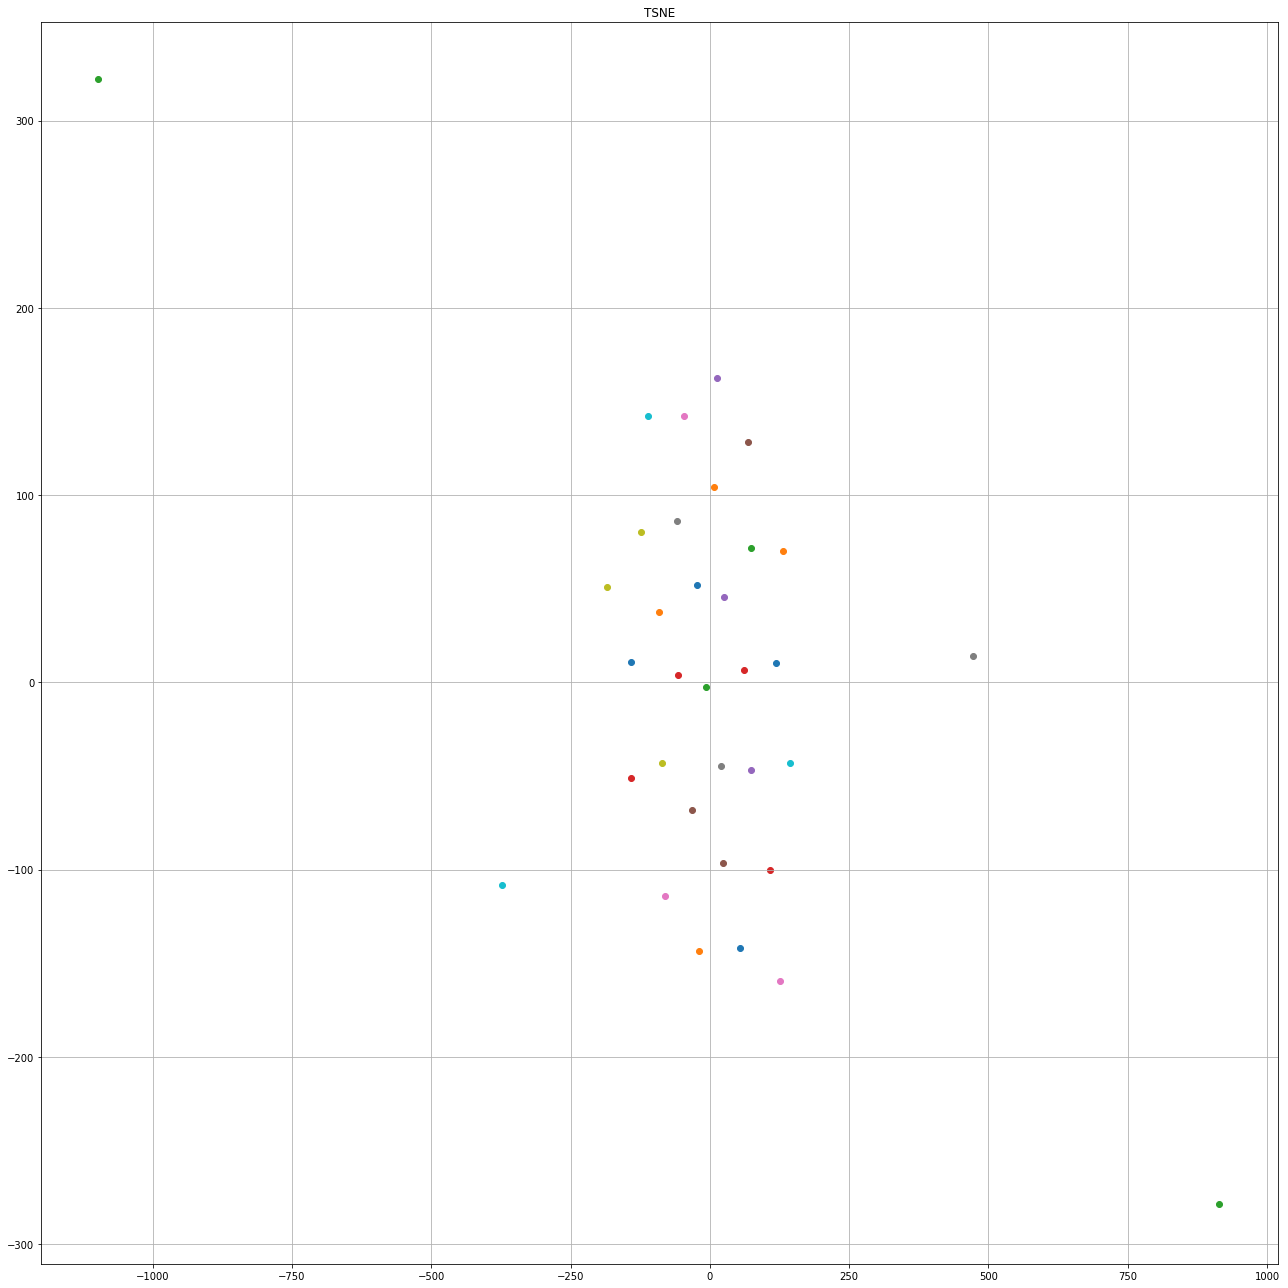

In [87]:
import sklearn.preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne_vector = TSNE(n_components=2, perplexity=30.0, init='pca', n_iter=5000).fit_transform(vectors)
print(tsne_vector.shape)


fig, ax = plt.subplots(figsize=(18, 18))
# print(mel_set)
for curve in mel_set:
#     ax.annotate(curve, (tsne_vector[mel_v_i[curve]][0], tsne_vector[mel_v_i[curve]][1] ))
    plt.scatter(tsne_vector[mel_v_i[curve]][0], tsne_vector[mel_v_i[curve]][1])

ax.set_title('TSNE')
ax.grid(True)
fig.tight_layout()    

# plt.figure(figsize=(18, 18))    
plt.show()
plt.close()

In [88]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
#     assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 5),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.savefig(filename)


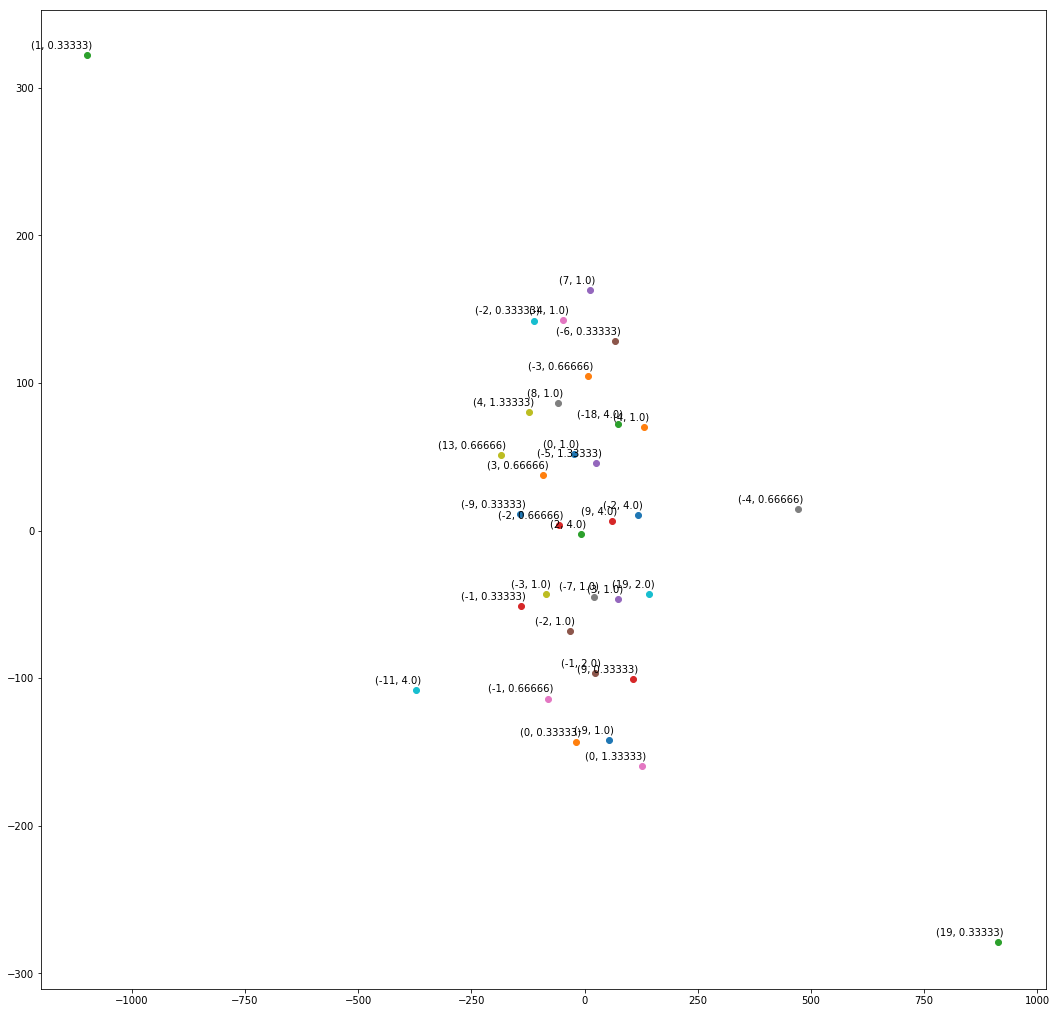

In [89]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(vectors)
labels = [mel_i_v[i] for i in xrange(len(vectors))]
plot_with_labels(low_dim_embs, labels)

# char RNN

In [22]:
import tensorflow as tf

In [23]:
def create_rnn_cell(self):
    cell = tf.contrib.rnn.BasicLSTMCell(num_units = self.hidden_size,
                                        state_is_tuple = True)
    return cell


def create_rnn(self, seq, hidden_size):

    multi_cells = tf.contrib.rnn.MultiRNNCell([self.create_rnn_cell()
                                               for _ in range(2)],
                                               state_is_tuple=True)
    multi_cells = rnn.DropoutWrapper(multi_cells, input_keep_prob=0.9, output_keep_prob=0.9)

    in_state = tf.placeholder_with_default(
            multi_cells.zero_state(tf.shape(seq)[0], tf.float32), [None, hidden_size])

    # this line to calculate the real length of seq
    # all seq are padded to be of the same length which is NUM_STEPS
    length = tf.reduce_sum(tf.reduce_max(tf.sign(seq), 2), 1)
    output, out_state = tf.nn.dynamic_rnn(multi_cells, seq, length, in_state)
    return output, in_state, out_state

In [24]:
num_vocab = 100

In [ ]:


input_sequence = tf.one_hot(input_sequence, num_vocab)

output, in_state, out_state = self.create_rnn(seq, hidden_layer_units)

logits = tf.contrib.layers.fully_connected(output, num_vocab, None)
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits[:, :-1], labels=seq[:, 1:]))
# sample the next character from Maxwell-Boltzmann Distribution with temperature temp
# it works equally well without tf.exp
sample = tf.multinomial(tf.exp(logits[:, -1] / tf.reduce_sum(tf.exp(logits))), 1)[:, 0] 